In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
import numpy as np

In [55]:
#Machine 함수 정의 
def Machine(x, w, b):
  y_hat = (w*x)+b
  return y_hat

In [56]:
x = np.array([1,3,5,7,9])
w = 2
b = 1

In [57]:
Machine(x, w, b)

array([ 3,  7, 11, 15, 19])

In [58]:
#Gradient() 정의

def Gradient(x, y, w, b):
  y_hat = Machine(x, w, b)
  dw = np.mean((y-y_hat) * (-2*x))
  db = np.mean((y-y_hat) * (-2))

  return dw, db

In [59]:
y = np.array([2,4,6,8,10])
dw, db = Gradient(x,y,w,b)

In [60]:
print('dw is', dw)
print('db is', db)

dw is 66.0
db is 10.0


In [61]:
#Learning 정의 
#step -> learning rate, step size라고 칭하며 이동 거리를 조정해줌
def Learning(x,y,w,b,step):
  dw, db = Gradient(x, y, w, b)

  uw = w - step * dw
  ub = b - step * db
  return uw, ub

In [62]:
#Learning Test

step = 0.05

uw, ub = Learning(x, y, w, b, step)


In [63]:
print('Updated_w is', '%.3f' %uw)
print('Updated_b is', '%.3f' %ub)

Updated_w is -1.300
Updated_b is 0.500


In [64]:
# TestData.csv 적용

import pandas as pd
import matplotlib.pyplot as plt

url ='https://raw.githubusercontent.com/rusita-ai/pyData/master/testData.csv'

data = pd.read_csv(url)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   inputs   5000 non-null   float64
 1   outputs  5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


In [66]:
data.head()

,inputs,outputs
0,0.2362,0.162367
1,0.9415,0.479356
2,0.3495,0.095733
3,0.3200,-0.111783
4,0.8335,0.386012


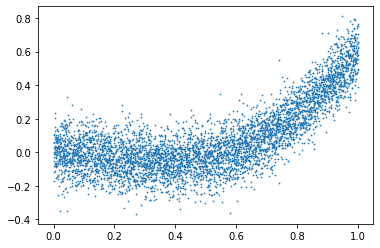

In [90]:
plt.scatter(data.inputs, data.outputs, s = 0.5)
plt.show()

In [91]:
#1500번 학습

w = 2
b = 3
step = 0.05
for i in range(0, 1500):
  uw,ub = Learning(data.inputs, data.outputs, w, b, step)
  w = uw
  b = ub

ValueError: ignored

In [69]:
print('Learned_w is', '%.3f' %w)
print('Learned_b is', '%.3f' %b)

Learned_w is 0.505
Learned_b is -0.170


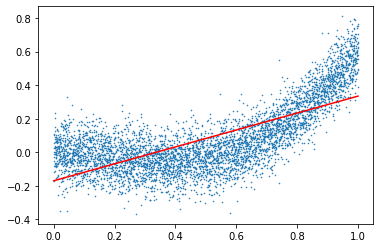

In [70]:
#회귀선 그리기

X = np.linspace(0, 1, 100)
Y = (w * X) + b

plt.scatter(data.inputs, data.outputs, s = 0.3)
plt.plot(X, Y, '-r', linewidth = 1.5)
plt.show()


In [71]:
# LOSS(MSE) Visualization

def Gradient(x, y, w, b):
  y_hat = Machine(x, w, b)

  dw = np.mean((y-y_hat) * (-2 * x))
  db = np.mean((y-y_hat) * (-2))
  MSE = np.mean((y-y_hat)**2)

  return dw, db, MSE
  

In [72]:
def Learning(x, y, w, b, step):
  dw, db, MSE = Gradient(x, y, w, b)

  uw = w - step * dw
  ub = b - step * db
  
  return uw, ub, MSE

In [92]:
w = 2
b = 3
step = 0.005
mse = []

for i in range(0, 1500):
  uw, ub, MSE = Learning(data.inputs, data.outputs, w, b, step)
  w = uw
  b = ub
  mse.append(MSE)

In [93]:
mse[0:10]

[15.595575679087718,
 15.202178493165306,
 14.818719420175633,
 14.444947398918606,
 14.080617710620423,
 13.725491818708216,
 13.379337212632366,
 13.041927255634274,
 12.713041036359867,
 12.392463224221752]

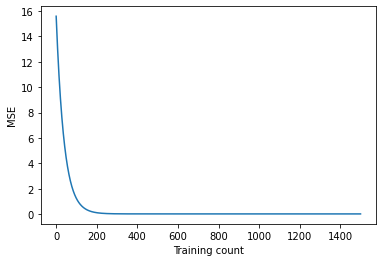

In [94]:
plt.plot(mse)
plt.ylabel("MSE")
plt.xlabel("Training count")
plt.show()

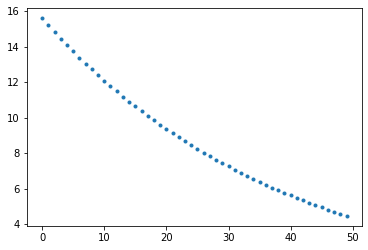

In [95]:
plt.plot(mse[0:50], '.')
plt.show()

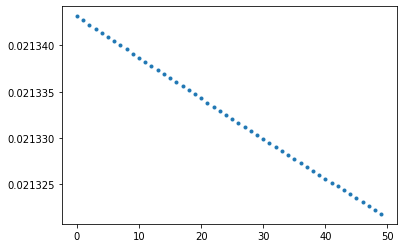

In [96]:
plt.plot(mse[1450:1500], '.')
plt.show()